In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

import env
import wrangle

In [2]:
df = wrangle.read_curriculum_logs()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [3]:
df = wrangle.prep_curriculum_data()
df.head()

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development


# Explore

### Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [4]:
# curriculum access value counts per program

df.program.value_counts()


Web Development    743918
Data Science       103412
Name: program, dtype: int64

In [5]:
# top 5 overall pages
print('10 Most Popular Pages in Web Dev Program & DS')

df.groupby(['program'])['endpoint'].value_counts().head(10)

10 Most Popular Pages in Web Dev Program & DS


program       endpoint                                
Data Science  /                                           8359
              search/search_index.json                    2203
              classification/overview                     1785
              1-fundamentals/modern-data-scientist.jpg    1655
              1-fundamentals/AI-ML-DL-timeline.jpg        1651
              1-fundamentals/1.1-intro-to-data-science    1633
              classification/scale_features_or_not.svg    1590
              fundamentals/AI-ML-DL-timeline.jpg          1443
              fundamentals/modern-data-scientist.jpg      1438
              sql/mysql-overview                          1424
Name: endpoint, dtype: int64

In [6]:
# remove pages that are not part of curriculum pages

df = df[df.endpoint.str.contains('jpeg') != True]

df = df[df.endpoint.str.contains('json') != True]

df = df[df.endpoint.str.contains('jpg') != True]

df = df[df.endpoint.str.contains('appendix') != True]

df = df[df.endpoint.str.contains('Appendix') != True]

df = df[df.endpoint != '/']

df = df[df.endpoint != 'toc']

In [7]:
# page views per cohort with count
page_views = df.groupby(['cohort_name'])['endpoint'].agg(['count', 'unique'])
page_views

,count,unique
cohort_name,,
Andromeda,22255,"[assets/js/pdfmake.min.js.map, html-css, html-..."
Apex,27737,"[html-css, html-css/introduction, java-i, java..."
Apollo,4,"[content/html-css, content/html-css/gitbook/im..."
Arches,7670,"[javascript-i, javascript-i/functions, javascr..."
Badlands,74,"[prework/fundamentals, prework/fundamentals/va..."
Bash,14773,"[html-css, html-css/introduction, prework/cli,..."
Bayes,20456,"[3-sql/1-mysql-overview, 2-storytelling/bad-ch..."
Betelgeuse,26128,"[html-css, spring, html-css/introduction, html..."
Ceres,35113,"[quiz, javascript-i, spring, java-i, java-iii,..."


In [8]:
# create ds dataframe
DS_df = df[(df.program == 'Data Science')]
DS_df.head(5)

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science


In [9]:
# top 5 overall pages
print('5 Most Popular Pages in Data Science Program')

DS_df.endpoint.value_counts().head(5)

5 Most Popular Pages in Data Science Program


classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
Name: endpoint, dtype: int64

In [10]:
# create Web dev df
Wb_df = df[(df.program == 'Web Development')]
Wb_df.head(5)

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development


Text(0, 0.5, 'Page Visits')

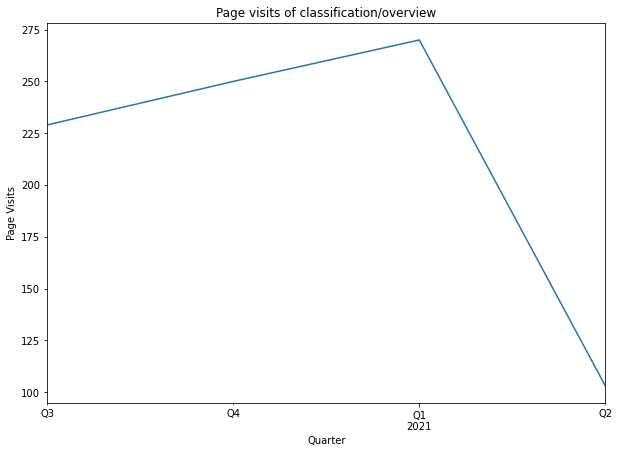

In [11]:
# plot data for top visited page 
plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'classification/overview'].endpoint.resample('Q').count().plot()
plt.title('Page visits of classification/overview')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

Text(0, 0.5, 'Page Visits')

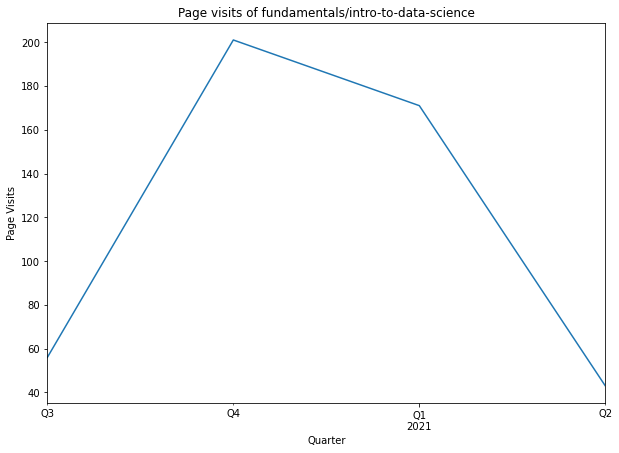

In [12]:
# plot data for lowest of top 5 visited page
plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'fundamentals/intro-to-data-science'].endpoint.resample('Q').count().plot()
plt.title('Page visits of fundamentals/intro-to-data-science')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

In [13]:
# top 5 overall pages
print('5 Most Popular Pages in Web Development Program')

Wb_df.endpoint.value_counts().head(5)

5 Most Popular Pages in Web Development Program


javascript-i    18193
java-iii        13162
html-css        13111
java-ii         12173
spring          11877
Name: endpoint, dtype: int64

Text(0, 0.5, 'Page Visits')

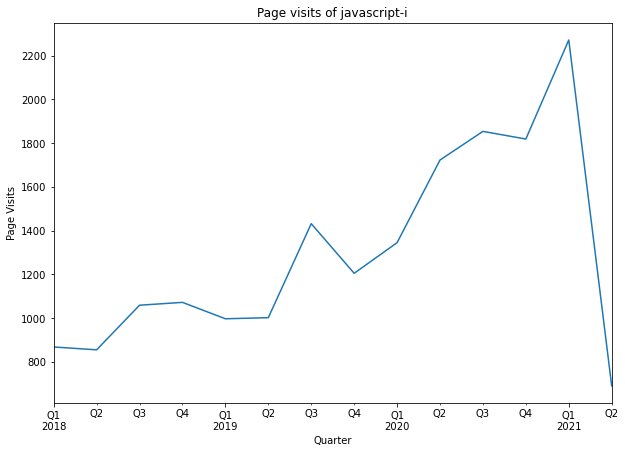

In [14]:
# plot data for top visited page 

plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'javascript-i'].endpoint.resample('Q').count().plot()
plt.title('Page visits of javascript-i')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

Text(0, 0.5, 'Page Visits')

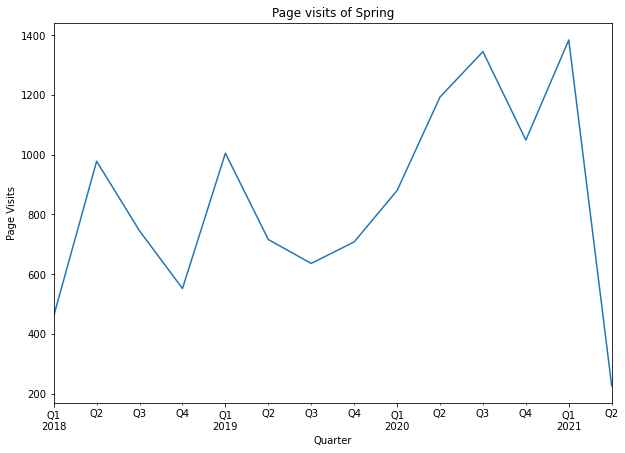

In [15]:
# plot data for lowest of top 5 visited page

plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'spring'].endpoint.resample('Q').count().plot()
plt.title('Page visits of Spring')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

### Takeaways
- For Data Science Program these are the top 5 pages with the most traffic:
    - classification/overview                    | count: 1785
    - 1-fundamentals/1.1-intro-to-data-science   | count: 1633
    - classification/scale_features_or_not.svg   | count: 1590
    - sql/mysql-overview                         | count: 1424
    - fundamentals/intro-to-data-science         | count: 1413
    
- For Web Development these are the top 5 pages with the most traffic:
    - javascript-i    | count: 18193
    - java-iii        | count: 13162
    - html-css        | count: 13111
    - java-ii         | count: 12173
    - spring          | count: 11877

### Question 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [16]:
pd.DataFrame(DS_df.endpoint.value_counts().head(5)).index


Index(['classification/overview', '1-fundamentals/1.1-intro-to-data-science',
       'classification/scale_features_or_not.svg', 'sql/mysql-overview',
       'fundamentals/intro-to-data-science'],
      dtype='object')

In [17]:
DS_views = DS_df[(DS_df.endpoint == 'classification/overview') | (DS_df.endpoint == '1-fundamentals/1.1-intro-to-data-science') | (DS_df.endpoint == 'classification/scale_features_or_not.svg') | (DS_df.endpoint == 'sql/mysql-overview') | (DS_df.endpoint == 'fundamentals/intro-to-data-science')]


In [18]:
DS_views = pd.crosstab(DS_views.cohort_id, DS_views.endpoint)


In [19]:
DS_views.columns = ['Classification/Overview','Fundamentals','Classification/Scaling','SQL Overview','Fundamentals/Intro to DS']


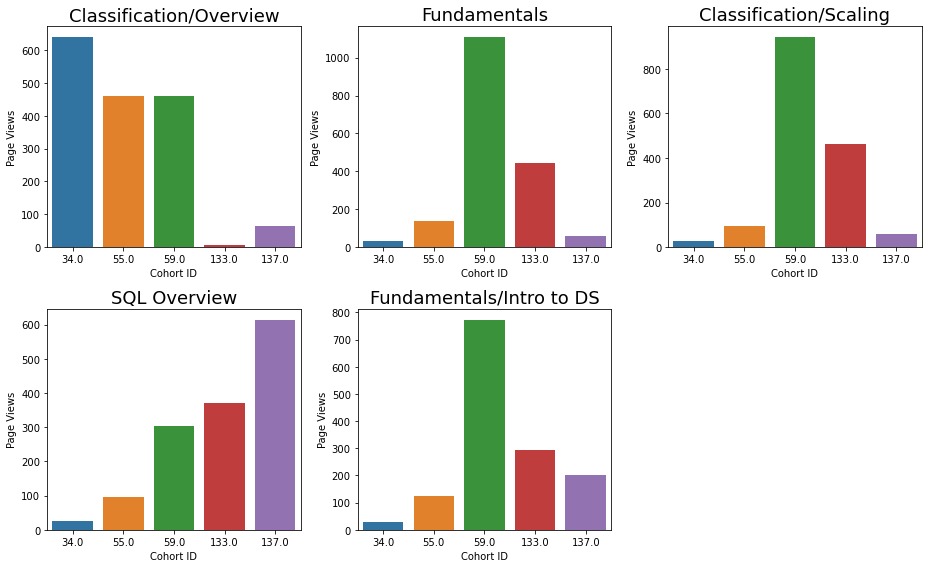

In [20]:
x = 1
plt.figure(figsize=(13,8))
for col in DS_views.columns:
    plt.subplot(2,3,x)
    x = x + 1
    sns.barplot(x=DS_views.index, y=DS_views[col])
    plt.title(col, fontsize=18)
    plt.xlabel("Cohort ID")
    plt.ylabel("Page Views")
    
plt.tight_layout()


In [21]:
# # least referred to lessons across all cohorts for Web Development program

# ds_curr = subset[subset.program =='Web Development'].base.value_counts().sort_values(ascending=True).to_frame()
# ds_curr.head(60)

In [22]:
# # least referred to lessons across all cohorts for Data Science program

# ds_curr = subset[subset.program =='Data Science'].base.value_counts().sort_values(ascending=True).to_frame()
# ds_curr.head(60)

In [23]:
# # cohort Andromeda
# ds_curr = subset[subset.cohort_name =='Andromeda'].base.value_counts().sort_values(ascending=True).to_frame()
# ds_curr.head(60)

In [24]:
# # Cohort Apex
# ds_curr = subset[subset.cohort_name =='Apex'].base.value_counts().sort_values(ascending=True).to_frame()
# ds_curr.head(60)

### Question 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [25]:
df.user_id.nunique()


966

In [26]:
df.user_id.value_counts()

64     13517
11     13123
53     11466
314     7083
1       5600
       ...  
593        1
857        1
212        1
461        1
348        1
Name: user_id, Length: 966, dtype: int64

In [27]:
page_views = df.groupby(['user_id'])['endpoint'].agg(['count', 'unique'])
page_views

,count,unique
user_id,,
1,5600,"[java-ii, java-ii/object-oriented-programming,..."
2,1382,"[javascript-i/conditionals, javascript-i/loops..."
3,1390,"[javascript-i/conditionals, javascript-i/funct..."
4,605,"[javascript-i/functions, javascript-i/introduc..."
5,1493,"[javascript-i/javascript-with-html, javascript..."
...,...,...
976,26,"[javascript-i, javascript-i/javascript-with-ht..."
977,83,"[javascript-i, javascript-i/javascript-with-ht..."
978,32,"[javascript-i, javascript-i/introduction, java..."


### Question 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [28]:
df.head()

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754421 entries, 2018-01-26 09:56:02 to 2021-04-21 16:44:39
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   endpoint      754421 non-null  object 
 1   user_id       754421 non-null  int64  
 2   cohort_id     710815 non-null  float64
 3   ip_address    754421 non-null  object 
 4   id            710815 non-null  float64
 5   cohort_name   710815 non-null  object 
 6   slack         710815 non-null  object 
 7   start_date    710815 non-null  object 
 8   end_date      710815 non-null  object 
 9   created_at    710815 non-null  object 
 10  updated_at    710815 non-null  object 
 11  deleted_at    0 non-null       float64
 12  program_id    710815 non-null  float64
 13  program_name  710815 non-null  object 
 14  program       710815 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 92.1+ MB


### There are user_ids that do not have a start or end date and are not associated with a particular cohort. I am going to check this out.

In [30]:
# create subset of df where name is null
subset = df[df.cohort_name.isnull()]

In [31]:
# check the number of unique user ids within this subset
subset.user_id.nunique()

78

### The function below loops through all users in the subset and returns those whose daily activity exceeds the upper limit of the bollinger band range (pct_b > 1)

In [32]:
# use functions to loop through each unique user id and get the activity for each user
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(subset.user_id.unique()):
    user_df = wrangle.find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [52]:
# check data
anomalies

,single_user_data,midband,ub,lb,pct_b,user_id
date,,,,,,
2018-04-04,86,11.916064,76.824272,-52.992144,1.070682,48
2018-09-18,6,0.423681,5.315388,-4.468027,1.069977,48
2018-10-03,29,2.142695,23.963500,-19.678110,1.115406,48
2019-01-08,7,0.459048,5.799117,-4.881021,1.112441,48
2019-03-19,23,1.488180,18.734041,-15.757681,1.123681,48
...,...,...,...,...,...,...
2020-05-06,48,7.931356,44.662153,-28.799441,1.045437,644
2020-10-14,1,0.075883,0.928997,-0.777232,1.041614,744
2020-11-29,4,0.262055,3.267228,-2.743118,1.121918,744


In [53]:
# sort by number of path views
anomalies.sort_values(by='single_user_data', ascending=False)

,single_user_data,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-27,152,19.694044,133.634400,-94.246312,1.080593,354
2018-06-24,146,15.148261,131.582438,-101.285915,1.061913,111
2020-08-06,126,18.631998,113.542881,-76.278885,1.065625,64
2019-08-15,118,17.744546,109.580482,-74.091391,1.045840,64
2020-02-03,105,13.114028,92.876418,-66.648362,1.075998,64
...,...,...,...,...,...,...
2019-01-17,1,0.064521,0.814212,-0.685170,1.123910,79
2020-02-20,1,0.070195,0.915685,-0.775295,1.049861,363
2021-01-26,1,0.064516,0.814126,-0.685094,1.123980,353


#### I am going to eliminate students who have 25 or less page views as it's less likely to be associated with suspicious activity even though it may be out of the norm for them

In [54]:
# narrow down anomalies to users who have more than 25 page views on any one day
anomalies = anomalies[anomalies.single_user_data > 25]
anomalies

,single_user_data,midband,ub,lb,pct_b,user_id
date,,,,,,
2018-04-04,86,11.916064,76.824272,-52.992144,1.070682,48
2018-10-03,29,2.142695,23.963500,-19.678110,1.115406,48
2018-03-21,44,4.309866,38.440338,-29.820607,1.081447,58
2018-10-20,56,3.856355,45.807690,-38.094980,1.121478,58
2018-04-23,28,3.191746,25.891057,-19.507565,1.046454,61
2018-06-20,27,1.743393,21.989847,-18.503062,1.123729,73
2018-09-25,28,1.861541,22.876824,-19.153742,1.121892,88
2018-10-01,58,5.862379,51.835363,-40.110606,1.067046,88
2019-07-01,62,4.077280,50.605216,-42.450657,1.122451,88


In [55]:
# check which users have the most days of anomalous activity
anomalies.groupby('user_id').single_user_data.count().sort_values(ascending=False)

user_id
64     7
88     6
375    4
111    3
48     2
349    2
352    2
354    2
358    2
58     2
720    2
372    2
644    1
729    1
728    1
718    1
364    1
429    1
368    1
366    1
73     1
61     1
736    1
Name: single_user_data, dtype: int64

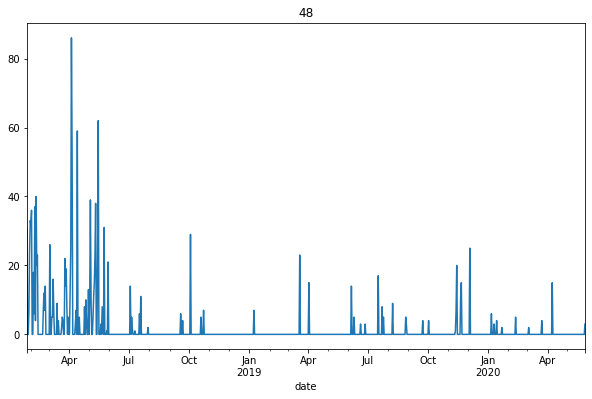

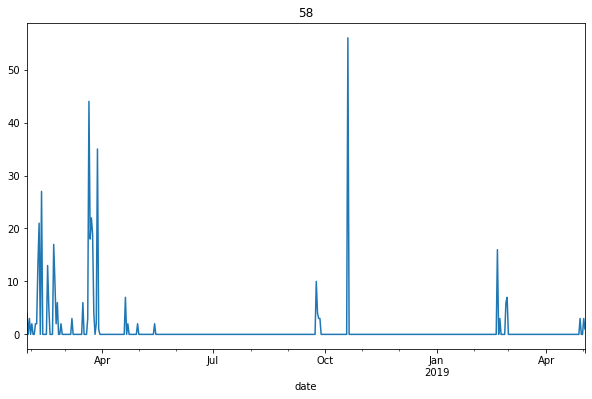

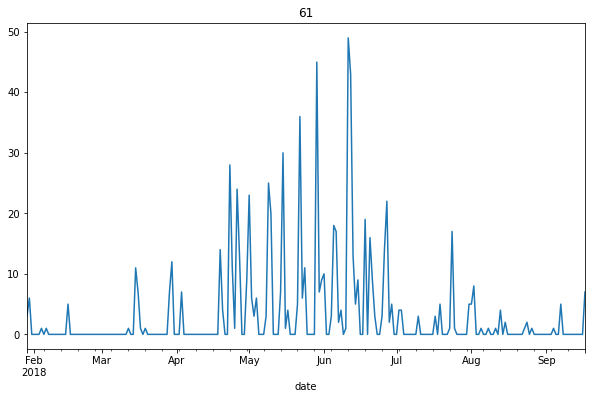

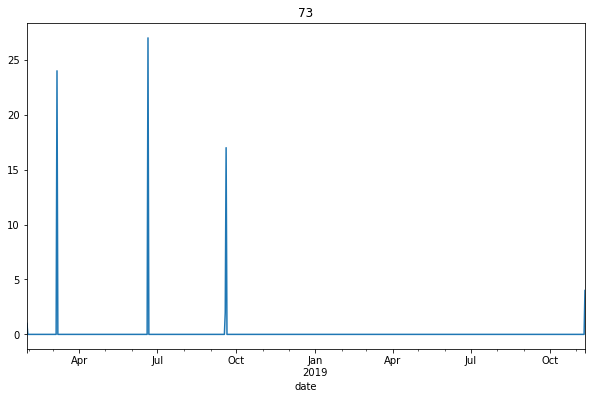

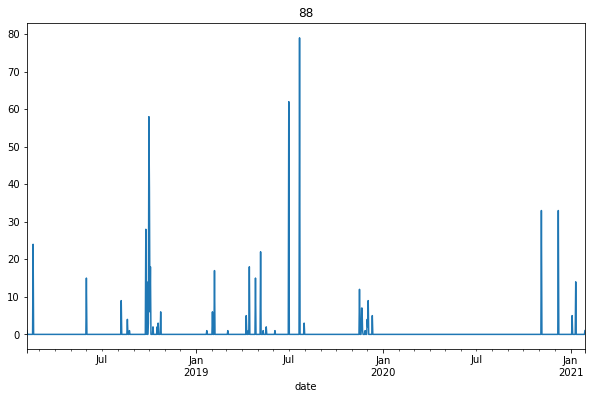

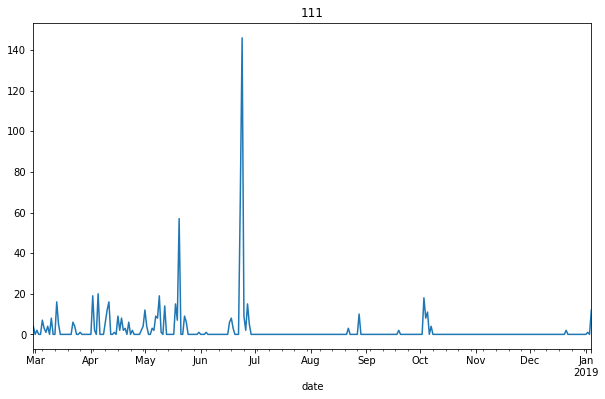

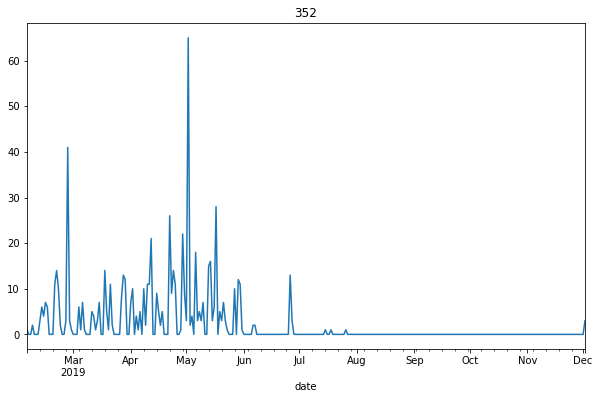

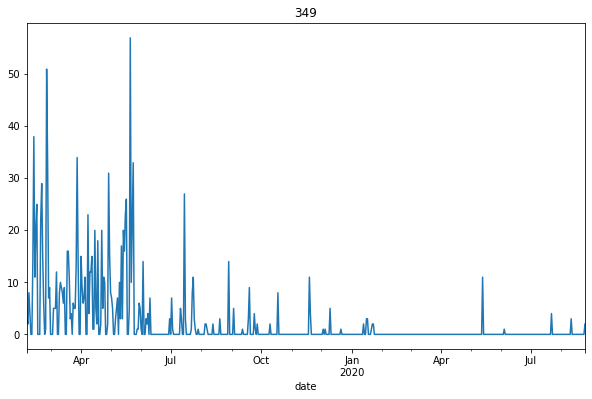

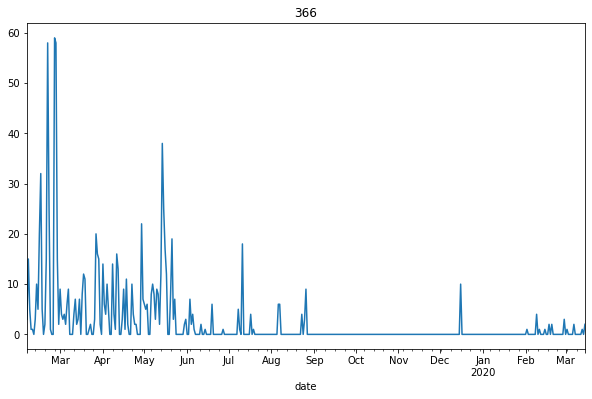

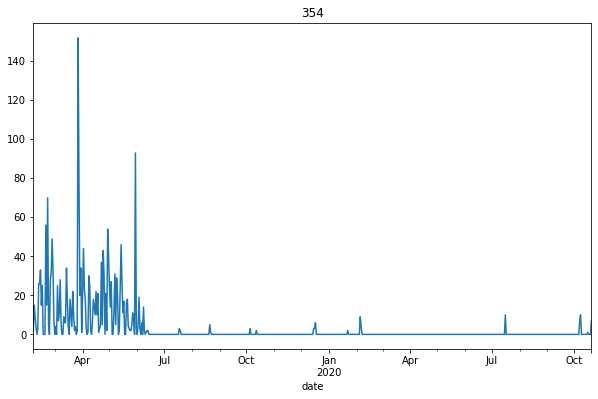

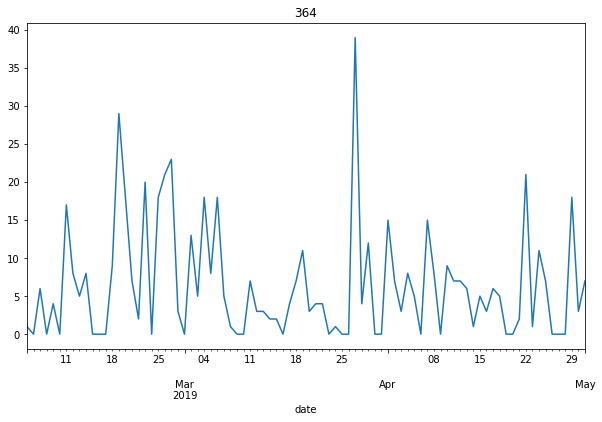

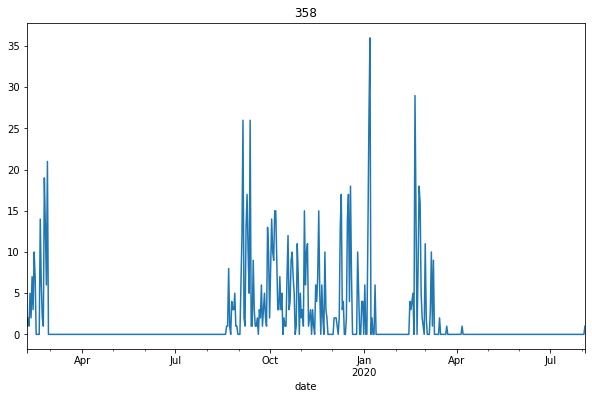

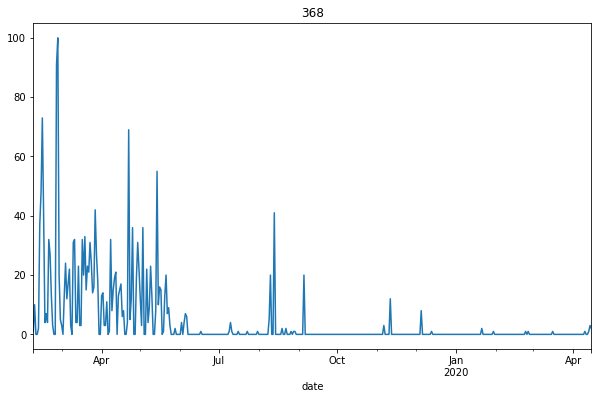

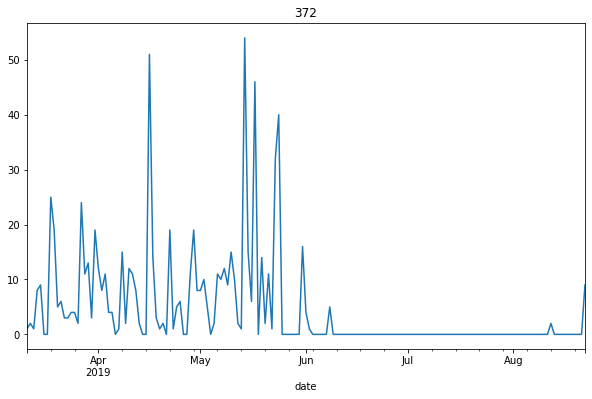

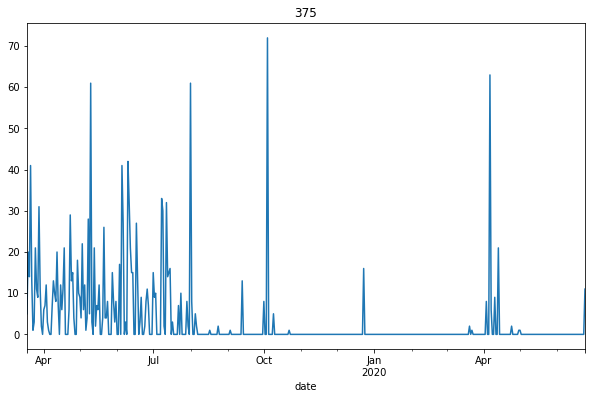

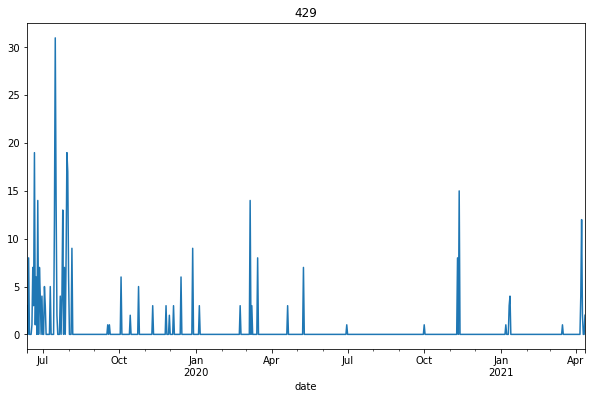

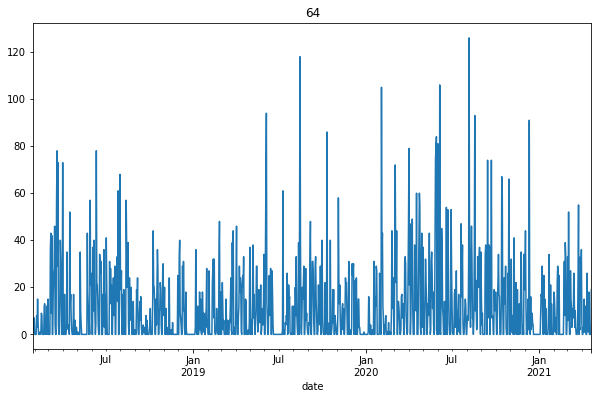

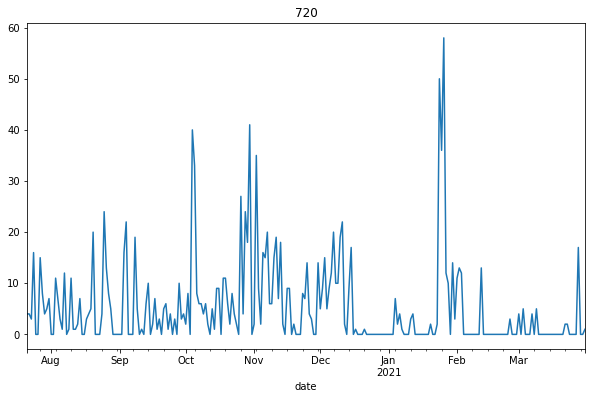

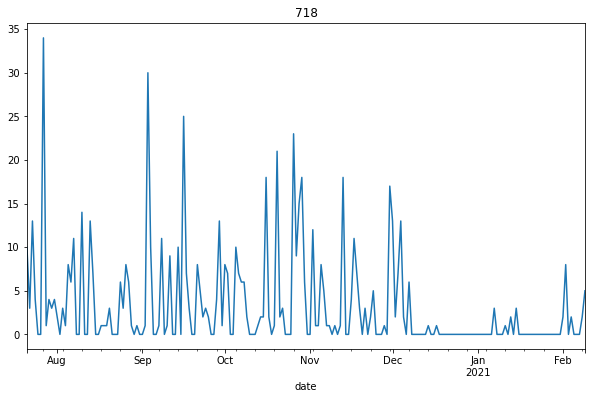

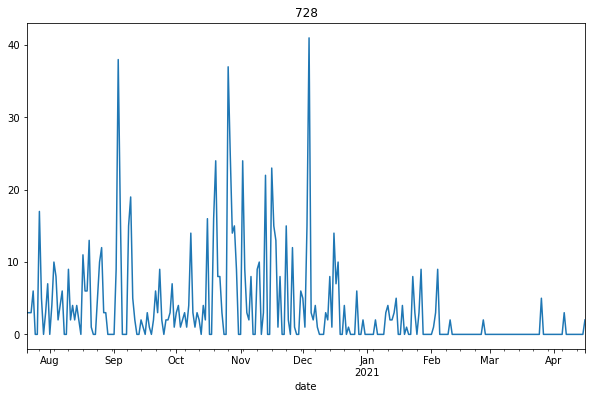

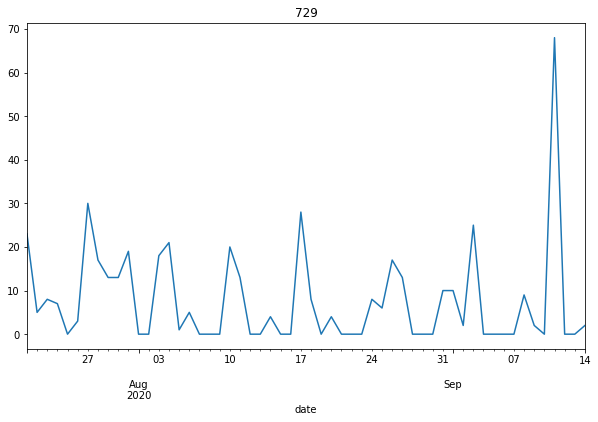

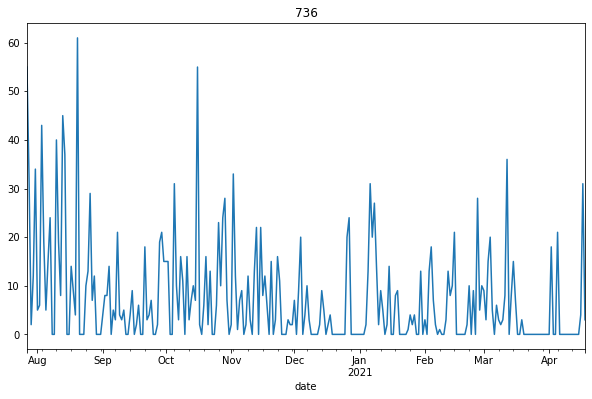

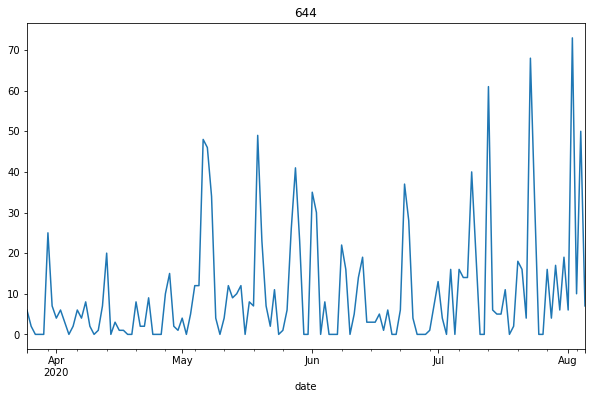

In [57]:
# plot individual user data
for user in anomalies.user_id.unique():
    df_user = wrangle.prep_data_by_user(df, user)
    df_user.plot(figsize=(10,6))
    plt.title(user)
    plt.show()

### With additional time, we would like to continue to explore the data for suspicious activity. At this point we have not gathered enough information to confirm there is suspicious activity but it does appear some users are accessing paths at abnormal rates.

### Question 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [34]:
# check when data science program began
df[(df.program_id == 3)].head()

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science


### Looking at the first rows for the data science program, it appears there was no data science course prior to 2019 so likely no curriculum that web development students would have had access to. It also appears that the first data science cohort, Ada, might not be included. This is confirmed in the code below.

In [35]:
#check cohort names in alphabetical order
df.cohort_name.value_counts().sort_index(ascending=True)

Andromeda     22255
Apex          27737
Apollo            4
Arches         7670
Badlands         74
Bash          14773
Bayes         20456
Betelgeuse    26128
Ceres         35113
Curie         16224
Darden        24137
Deimos        28509
Denali            2
Easley        11240
Europa        23838
Florence       5752
Fortuna       30937
Franklin         65
Ganymede      28046
Glacier         510
Hampton        1301
Hyperion      25337
Ike             209
Joshua          271
Jupiter       30744
Kalypso       20757
Kings          2499
Lassen         8910
Luna          14889
Mammoth         599
Marco         13780
Neptune        6111
Niagara         640
Oberon         1374
Olympic        4539
Pinnacles      1855
Quincy          965
Sequoia        5978
Staff         66575
Teddy         26511
Ulysses       24933
Voyageurs     31134
Wrangell      22056
Xanadu        24715
Yosemite      17908
Zion          32755
Name: cohort_name, dtype: int64

In [36]:
# check where data science students are accessing paths related to web development
ds_access_webdev = df[(df.program == 'Data Science') & df.endpoint.str.contains('java')]
ds_access_webdev

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2019-09-23 11:45:09,java-iii,476,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:30:44,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:07,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:11,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:12,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:14,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:19,java-ii,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:32:23,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:32:34,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science


In [37]:
# get the individual user ids that are accessing curriculum outside of their program
set(ds_access_webdev.user_id)

{467, 472, 476, 590}

In [38]:
# check where web development students are accessing paths related to data science
webdev_access_ds = df[(df.program_id.isin([1,2,4])) & (df.endpoint != 'Staff') & (df.endpoint.str.contains('science'))]
webdev_access_ds

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,25.0,70.120.5.227,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,NaN,2.0,Java Full Stack Web Development,Web Development
2019-04-13 01:40:39,data-science,220,25.0,70.120.5.227,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-15 16:21:32,1-fundamentals/1-intro-to-data-science,404,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-15 16:24:30,1-fundamentals/1-intro-to-data-science,11,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-16 09:45:58,1-fundamentals/1-intro-to-data-science,11,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,Java Full Stack Web Development,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 10:34:43,fundamentals/intro-to-data-science,11,28.0,76.185.131.226,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,Java Full Stack Web Development,Web Development
2021-04-20 11:13:03,fundamentals/intro-to-data-science,11,28.0,76.185.131.226,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,Java Full Stack Web Development,Web Development
2021-04-21 09:13:45,fundamentals/intro-to-data-science,1,28.0,70.121.199.82,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,Java Full Stack Web Development,Web Development


In [39]:
# get the individual user ids that are accessing curriculum outside of their program
set(webdev_access_ds.user_id)

{1,
 11,
 18,
 20,
 37,
 41,
 53,
 64,
 94,
 124,
 138,
 143,
 146,
 171,
 201,
 211,
 220,
 248,
 249,
 314,
 315,
 373,
 404,
 410,
 417,
 423,
 428,
 430,
 433,
 450,
 451,
 458,
 480,
 495,
 502,
 513,
 521,
 539,
 546,
 572,
 581,
 630,
 742,
 744,
 790,
 813,
 816}

### The first data science cohort graduated in June 2019 (although not in the dataset) so there is no evidence of access to both curriculums before then. There is evidence of data science students accessing web development curriculum and vice versa through 2019 and after although it is limited to 4 data science students and 23 web development students.

### Question 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [40]:
# create new columns with the root and end path of the endpoints
df[['root', 'end_path']] = df.endpoint.str.split(pat='/', n=1, expand=True)

In [41]:
# strip any leading numbers or special characters
df.root = df.root.str.lstrip('0123456789.- ')
df.head()

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program,root,end_path
date,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development,java-ii,None
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development,java-ii,object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development,slides,object_oriented_programming
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development,javascript-i,conditionals
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development,javascript-i,loops


In [42]:
# check top pages for data science
ds_topics = df[(df.program_id == 3) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
ds_topics.head(10)

,root
sql,1554
classification,1236
python,845
fundamentals,753
regression,706
stats,527
timeseries,497
nlp,487
anomaly-detection,365
clustering,280


# The topics that data science students return to the most after graduation are:

1. SQL

2. Fundamentals

3. Classification

4. Python

5. Regression

In [43]:
# check top pages for web development
wd_topics = df[(df.program_id.isin([1,2,4])) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
wd_topics.head(10)

,root
javascript-i,19150
spring,17128
html-css,14496
mysql,13782
java-iii,11466
java-ii,10954
jquery,9836
java-i,9050
content,8216
javascript-ii,8145


### The topics that web development students return to the most after graduation are:

1. Javascript

2. Spring

3. HTML-CSS

4. MySQL

5. Java

### Question 7. Which lessons are least accessed?

In [44]:
# reset index
ds_topics.reset_index(inplace=True)

In [45]:
# rename columns
ds_topics.columns = ('root', 'count')
ds_topics.head()

,root,count
0,sql,1554
1,classification,1236
2,python,845
3,fundamentals,753
4,regression,706


In [46]:
# check the topics that have less than 10 counts
ds_topics[ds_topics['count'] < 10]

,root,count
13,capstones,8
14,mysql,5
15,cli,4
16,scale_features_or_not.svg,3
17,Selecting_a_hypothesis_test.svg,2
18,overview,2
19,individual-project,1
20,database-design,1
21,acquire-and-prep,1
22,search,1


### I am going to remove the roots with less than 10 counts as they are files within the curriculum or fall under a main topic

In [47]:
# remove lower counts from dataframe
ds_topics = ds_topics[ds_topics['count'] > 10]

In [48]:
# get least accessed topics for data science
least_accessed = ds_topics.tail(10)
least_accessed

,root,count
3,fundamentals,753
4,regression,706
5,stats,527
6,timeseries,497
7,nlp,487
8,anomaly-detection,365
9,clustering,280
10,distributed-ml,231
11,advanced-topics,178
12,storytelling,169


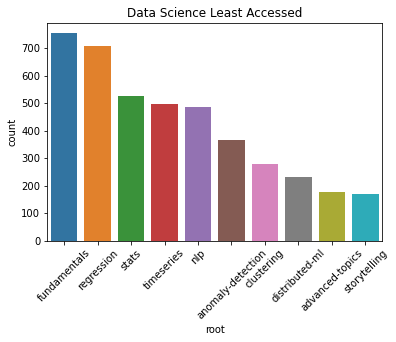

In [49]:
# plot data science least accessed
sns.barplot(data=least_accessed, x='root', y='count')
plt.title('Data Science Least Accessed')
plt.xticks(rotation=45);

### The topics that data science students return to the least after graduation are:

1. Advanced Topics

2. Storytelling

3. Distributed Machine Learning

4. Clustering

5. Natural Language Processing

In [50]:
# reset index
wd_topics.reset_index(inplace=True)
# rename columns
wd_topics.columns = ('root', 'count')

In [51]:
# remove lower counts from dataframe
wd_topics = wd_topics[wd_topics['count'] > 10]
# get least accessed topics for data science
least_accessed = wd_topics.tail(10)
least_accessed

,root,count
113,vocabulary.md,12
114,_navigating_the_filesystem,11
115,cohorts,11
116,open_data,11
117,limit,11
118,_Inspect,11
119,_TFIDF,11
120,_KMeans2,11
121,Classification_AcquireData,11
122,_file_paths,11


# The topics that web development students return to the least after graduation are:

1. _Inspect

2. _TFIDF

3. _navigating_the_filesystem

4. limit

5. _KMeans2

**Many of the least accessed topics appear to be data science topics. This may be where several web development students still have and are accessing the curriculum**